In [1]:
import osmnx as ox
import geopandas as gpd
import numpy as np

In [4]:
# Specify the area of interest
place_name = "Greater London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [2]:
def create_grid(gdf=None, bounds=None, n_cells=10, overlap=False, crs="EPSG:29902"):
    """Create square grid that covers a geodataframe area
    or a fixed boundary with x-y coords
    returns: a GeoDataFrame of grid polygons
    see https://james-brennan.github.io/posts/fast_gridding_geopandas/
    """

    import geopandas as gpd
    import shapely

    if bounds != None:
        xmin, ymin, xmax, ymax= bounds
    else:
        xmin, ymin, xmax, ymax= gdf.total_bounds

    # get cell size
    cell_size = (xmax-xmin)/n_cells
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            x1 = x0-cell_size
            y1 = y0+cell_size
            poly = shapely.geometry.box(x0, y0, x1, y1)
            #print (gdf.overlay(poly, how='intersection'))
            grid_cells.append( poly )

    cells = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                     crs=crs)
    if overlap == True:
        cols = ['grid_id','geometry','grid_area']
        cells = cells.sjoin(gdf, how='inner').drop_duplicates('geometry')
    return cells

In [10]:
import pylab as plt
counties = area
counties = counties.to_crs("EPSG:29902")
gr = create_grid(counties, n_cells=150, overlap=True, crs="EPSG:29902")

<Axes: >

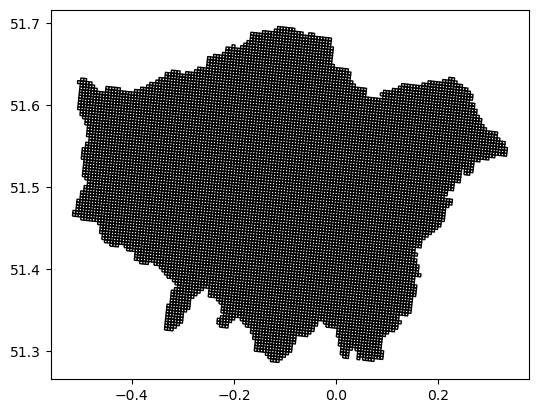

In [ ]:
gr = gr.to_crs("EPSG:4326")
gr.plot(fc="none", ec='black')

In [14]:
gr.to_file("grid.shp")

C:\Users\Anne\AppData\Local\Temp\ipykernel_8260\2481955985.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gr.to_file("grid.shp")


In [51]:
import geopandas as gpd
from shapely import geometry
 
# Create a fishnet
if __name__ == '__main__':
    # Read the shapefile
    gdf = area
 
    # Reproject to projected coordinate system
    gdf = gdf.to_crs('EPSG:3857')
 
    # Get the extent of the shapefile
    total_bounds = gdf.total_bounds
 
    # Get minX, minY, maxX, maxY
    minX, minY, maxX, maxY = total_bounds
 
    # Create a fishnet
    x, y = (minX, minY)
    geom_array = []
 
    # Polygon Size
    square_size = 100
    while y <= maxY:
        while x <= maxX:
            geom = geometry.Polygon([(x,y), (x, y+square_size), (x+square_size, y+square_size), (x+square_size, y), (x, y)])
            geom_array.append(geom)
            x += square_size
        x = minX
        y += square_size
 
    fishnet = gpd.GeoDataFrame(geom_array, columns=['geometry']).set_crs('EPSG:3857')
    

In [52]:
fishnet = fishnet.to_crs('epsg:4236')

In [39]:
fishnet = fishnet.within(area)

C:\Users\Anne\AppData\Local\Temp\ipykernel_8260\3779196310.py:1: UserWarning: The indices of the two GeoSeries are different.
  fishnet = fishnet.within(area)
C:\Users\Anne\AppData\Local\Temp\ipykernel_8260\3779196310.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  fishnet = fishnet.within(area)


In [54]:
fishnet.to_file('fishnet_grid.shp')



In [49]:
fishnet = fishnet.within(area)

C:\Users\Anne\AppData\Local\Temp\ipykernel_8260\3779196310.py:1: UserWarning: The indices of the two GeoSeries are different.
  fishnet = fishnet.within(area)
C:\Users\Anne\AppData\Local\Temp\ipykernel_8260\3779196310.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  fishnet = fishnet.within(area)


In [46]:
fishnet_london = gpd.GeoSeries(fishnet, fishnet.all)

TypeError: Index(...) must be called with a collection of some kind, <bound method DataFrame.all of                                                  geometry
0       POLYGON ((-56814.696 6672175.879, -56814.696 6...
1       POLYGON ((-56714.696 6672175.879, -56714.696 6...
2       POLYGON ((-56614.696 6672175.879, -56614.696 6...
3       POLYGON ((-56514.696 6672175.879, -56514.696 6...
4       POLYGON ((-56414.696 6672175.879, -56414.696 6...
...                                                   ...
681495  POLYGON ((36685.304 6744575.879, 36685.304 674...
681496  POLYGON ((36785.304 6744575.879, 36785.304 674...
681497  POLYGON ((36885.304 6744575.879, 36885.304 674...
681498  POLYGON ((36985.304 6744575.879, 36985.304 674...
681499  POLYGON ((37085.304 6744575.879, 37085.304 674...

[681500 rows x 1 columns]> was passed

In [22]:
fishnet_london.length

AttributeError: 'Series' object has no attribute 'length'

In [55]:
fishnet = gpd.read_file('fishnet_grid.shp')

In [59]:
fishnet = area.within(fishnet)

TypeError: (<class 'geopandas.geoseries.GeoSeries'>, <class 'pandas.core.series.Series'>)

In [58]:
fishnet.plot()

TypeError: no numeric data to plot

In [ ]:
def generate_buffer_meter(data, radiu, crs='epsg:4326'):
    data = data.to_crs(epsg=3395)
    buffer = data.buffer(radiu, cap_style="square") 
    data = buffer.to_crs(crs)
    return data

In [ ]:
import pandas as pd
points= pd.read_parquet("distinct_LONLAT.parquet")


In [66]:
points = gpd.GeoDataFrame(
    points, geometry=gpd.points_from_xy(points.XLON, points.XLAT), crs="EPSG:4326"
)

In [78]:
grid = generate_buffer_meter(points, 50 )

In [79]:
grid

0         POLYGON EMPTY
1         POLYGON EMPTY
2         POLYGON EMPTY
3         POLYGON EMPTY
4         POLYGON EMPTY
              ...      
892704    POLYGON EMPTY
892705    POLYGON EMPTY
892706    POLYGON EMPTY
892707    POLYGON EMPTY
892708    POLYGON EMPTY
Length: 892709, dtype: geometry

In [76]:
grid.to_file("grid2.shp")